In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib
import analysis_pca

Ts = 1000
data_path = r'/home/jb/Desktop/work/python_code'
save_path = r'/home/jb/Desktop/work/figure'

In [2]:
#For FN PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()
PCA_total = apca.pca_analy(data_cat_sm)


# PCA to PCA

PCA_total2 = apca.pca_to_pca(PCA_total, 4)

Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 63.94%
Dimensions: 2, Variance explained: 75.89%
Dimensions: 3, Variance explained: 81.82%
Dimensions: 4, Variance explained: 85.62%
Dimensions: 5, Variance explained: 88.53%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.24%
Dimens

In [3]:
# PCA to PCA

pca_data = []
for a in range(8):
    temp = PCA_total[a]['p']
    temp = temp[:,:4]
    pca_data.append(temp)

pca_data = np.array(pca_data)
pca_data = np.concatenate(pca_data, axis = 1)

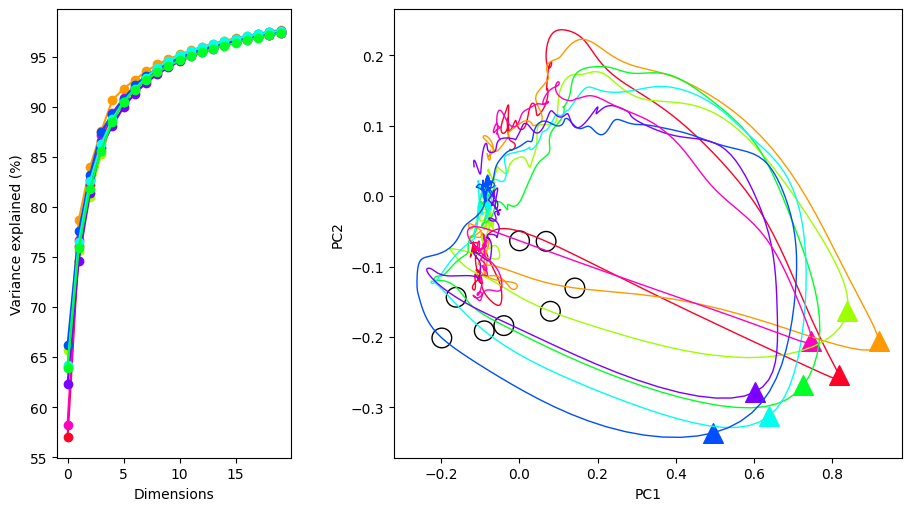

In [22]:
# Pretty figures1
from scipy.ndimage import gaussian_filter1d
win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

# rainbow color

cmap = matplotlib.colormaps.get_cmap("gist_rainbow")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

# color = np.array([255, 0, 0,
#                  255, 127, 0,
#                  255, 255, 0,
#                  0, 255, 0,
#                  0, 0, 255,
#                  75, 0, 130,
#                  148, 0, 211,
#                  0, 0, 0])
# color = color / 255
# color = color.reshape(8,3)


fig = plt.figure(constrained_layout=True,figsize=(9,5))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[2, 4])

#pca
subfigs[1].subplots(1, 1)
for ori in range(8):
   
    temp_PC = PCA_total[ori]['p'].T
    
    s_temp1 = gaussian_filter1d(temp_PC[0], win)
    s_temp2 = gaussian_filter1d(temp_PC[1], win)
    s_temp3 = gaussian_filter1d(temp_PC[2], win)

    X = s_temp1[0:600]
    Y = s_temp2[0:600]
    Z = s_temp3[0:600]

    # plt.scatter(X, Y, s=10, color=C_list[ori], marker='o')
    plt.plot(X[50:500], Y[50:500], linewidth=1.0, color=C_list[ori])
    plt.scatter(X[280], Y[280], s=200, color=[0, 0, 0], facecolors='none')
    plt.scatter(X[300], Y[300], marker='^', s=200, color = C_list[ori])
    
plt.xlabel('PC1')
plt.ylabel('PC2')
    # zlabel('PC3')

#variance explained
subfigs[0].subplots(1, 1)
for ori in [2, 1, 0, 7, 6, 5, 4, 3]: # right to down right, anticlock-wise
    dd = PCA_total[ori]['dd']

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100

    # Plot variance explained
    plt.plot(var_explained[:20], 'o-', label="Cumulative variance explained", color = C_list[ori])
    plt.xlabel('Dimensions')
    plt.ylabel('Variance explained (%)')

# plt.savefig('pc1.jpg', dpi=300)

plt.show()

In [26]:
PCA_total2['p']

array([[-0.18238706,  0.09508371,  0.24009215, ...,  0.00166587,
         0.00660276, -0.00265604],
       [-0.20296298,  0.0670034 ,  0.22334316, ..., -0.00075601,
         0.00468343, -0.00036593],
       [-0.22238242,  0.04041148,  0.20750568, ..., -0.00280692,
         0.00304366,  0.00171521],
       ...,
       [-0.2345679 ,  0.18306756, -0.12488032, ..., -0.0027183 ,
        -0.00175146, -0.00148969],
       [-0.22583862,  0.20594782, -0.12130652, ..., -0.00340353,
        -0.00511964, -0.00416325],
       [-0.21610764,  0.23004738, -0.11748493, ..., -0.00440048,
        -0.00872574, -0.00692926]], shape=(600, 32))

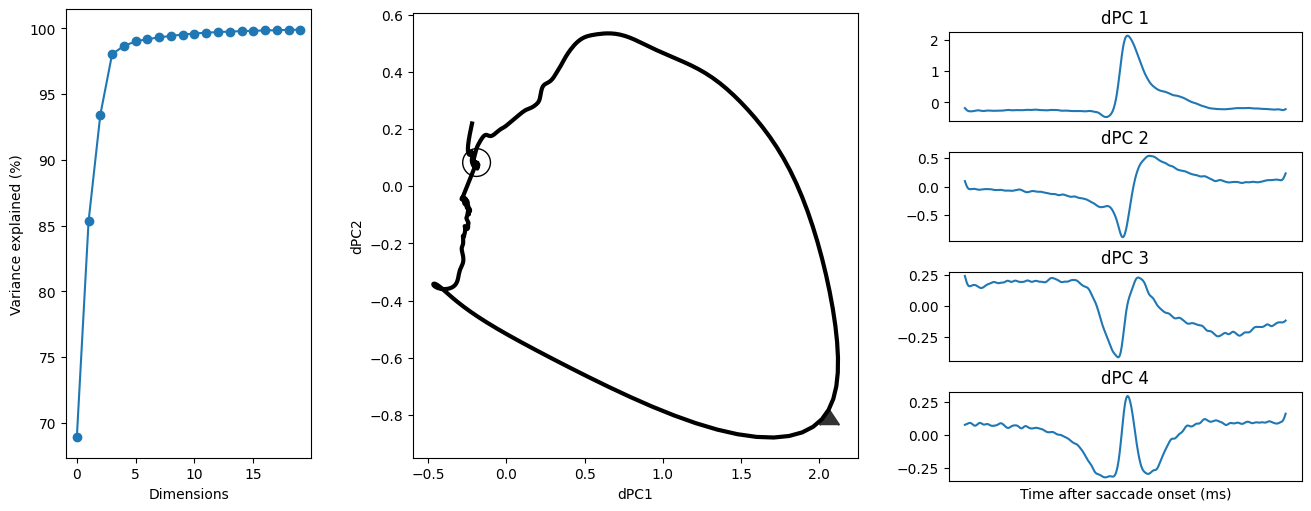

In [27]:
# Pretty figures2
from matplotlib.markers import CARETUP

fig = plt.figure(constrained_layout=True,figsize=(13,5))
subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[3, 5, 4])

# Plot variance explained
subfigs[0].subplots(1, 1)
dd = PCA_total2['dd']
var_explained = np.cumsum(dd) * 100
plt.plot(var_explained[:20], 'o-')
plt.xlabel('Dimensions')
plt.ylabel('Variance explained (%)')
# plt.title('Variance Explained')

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()


# Plot dPCA
subfigs[1].subplots(1, 1)

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
 
temp_PC = PCA_total2['p'].T

s_temp1 = gaussian_filter1d(temp_PC[0], win)
s_temp2 = gaussian_filter1d(temp_PC[1], win)
s_temp3 = gaussian_filter1d(temp_PC[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

# plt.scatter(X, Y, s=10, color = [0, 0, 0], marker='o')
plt.plot(X, Y, linewidth=3.0, color = [0, 0, 0])
plt.scatter(X[0], Y[0], s=400, color = [0, 0, 0], facecolors='none')
plt.scatter(X[300], Y[300], marker=CARETUP, s=200, color = [0, 0, 0], facecolor = [0.2, 0.2, 0.2])
plt.xlabel('dPC1')
plt.ylabel('dPC2')
# zlabel('PC3')

# plt.rc('font', size=25)

# Plot the principal component time series (scores)
subfigs[2].subplots(4, 1)

for i in range(4):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(np.arange(-300, 300), temp_PC[i, :600])  # Assuming 600 time steps
    ax.set_title(f'dPC {i + 1}')
    ax.axis('on')
    ax.get_xaxis().set_ticks([])
plt.xlabel('Time after saccade onset (ms)')
# plt.tight_layout()

plt.savefig('pc.jpg', dpi=300)

plt.show()